In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5358,ham,Hmm. Shall i bring a bottle of wine to keep us...,NaN,NaN,NaN
3627,ham,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN
4643,ham,Did u got that persons story,NaN,NaN,NaN
1173,ham,ÌÏ dun need to pick ur gf?,NaN,NaN,NaN
4069,ham,Ok i wont call or disturb any one. I know all ...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [ ]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['target'] = encode.fit_transform(df['target'])

In [ ]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

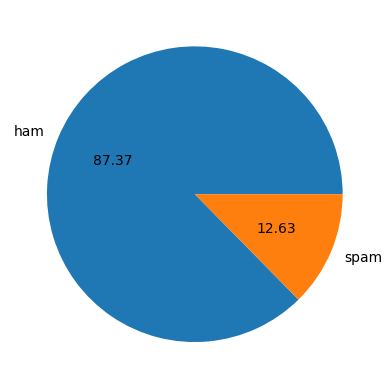

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char'] = df['text'].apply(len)

<ipython-input-20-9dedb45ef33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [ ]:
df.head

<bound method NDFrame.head of       target                                               text  num_char
0          0  Go until jurong point, crazy.. Available only ...       111
1          0                      Ok lar... Joking wif u oni...        29
2          1  Free entry in 2 a wkly comp to win FA Cup fina...       155
3          0  U dun say so early hor... U c already then say...        49
4          0  Nah I don't think he goes to usf, he lives aro...        61
...      ...                                                ...       ...
5567       1  This is the 2nd time we have tried 2 contact u...       161
5568       0              Will Ì_ b going to esplanade fr home?        37
5569       0  Pity, * was in mood for that. So...any other s...        57
5570       0  The guy did some bitching but I acted like i'd...       125
5571       0                         Rofl. Its true to its name        26

[5169 rows x 3 columns]>

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-22-308107bd3763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-24-b3857ac87c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

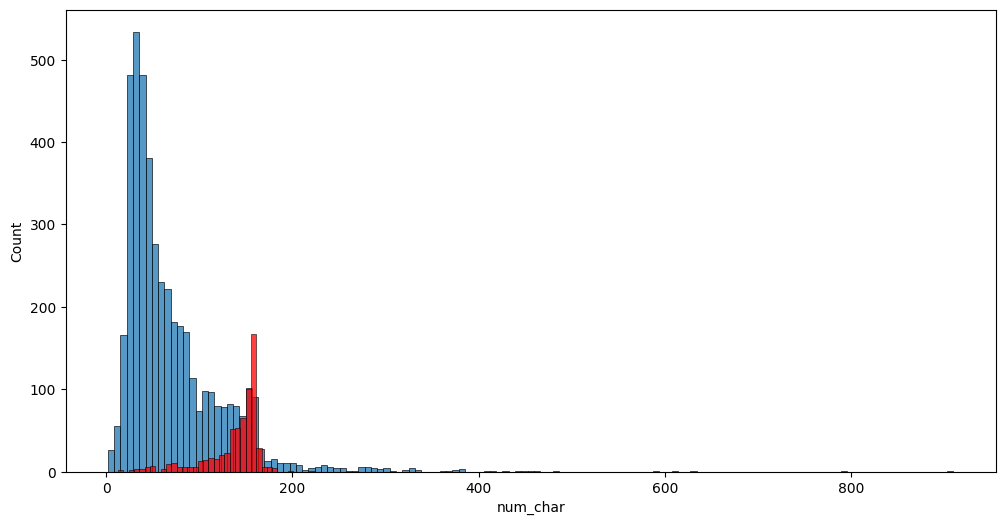

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0] ['num_char'])
sns.histplot(df[df['target'] == 1] ['num_char'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

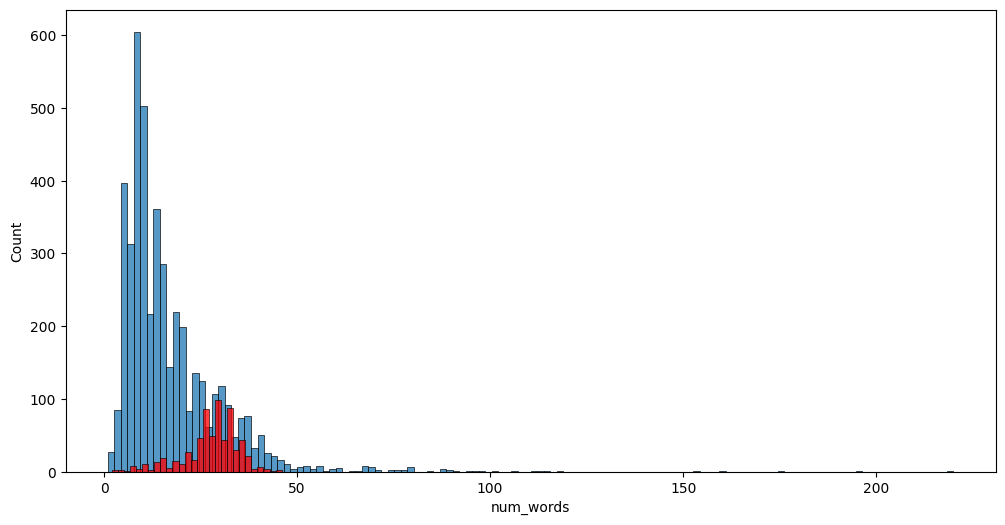

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'], color = 'red')

<Axes: xlabel='num_sent', ylabel='Count'>

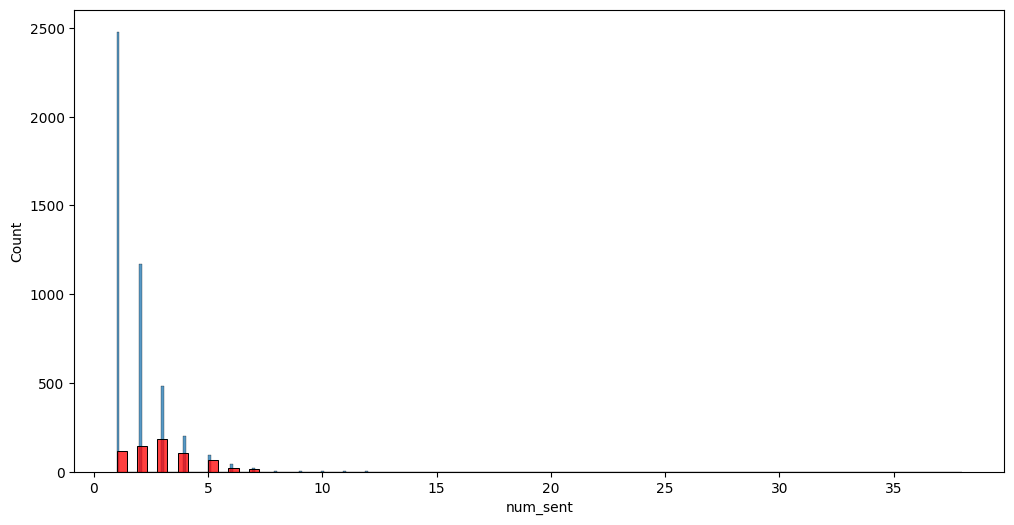

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0] ['num_sent'])
sns.histplot(df[df['target'] == 1] ['num_sent'], color = 'red')

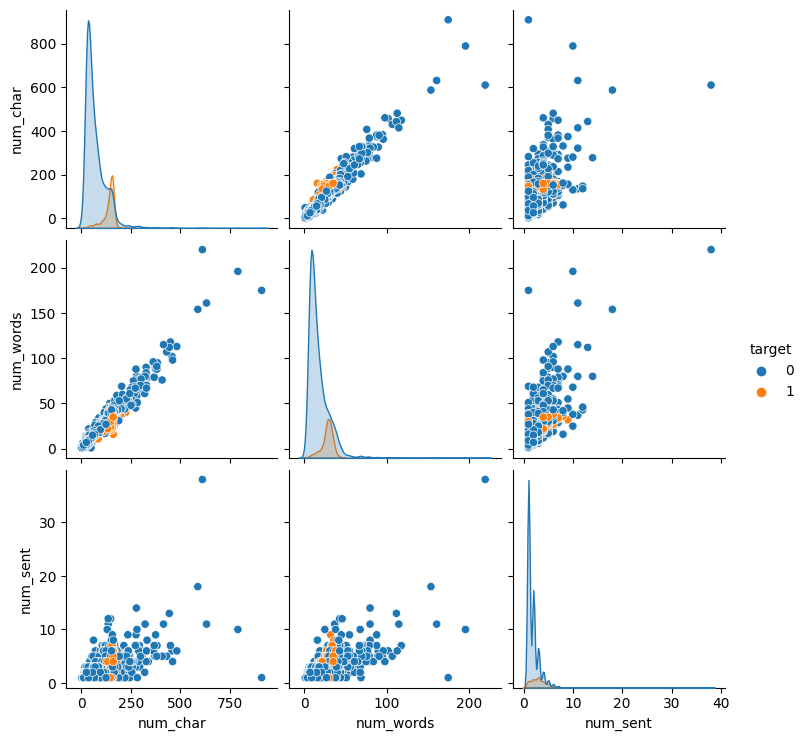

In [ ]:
sns.pairplot(df, hue= 'target')

<ipython-input-34-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

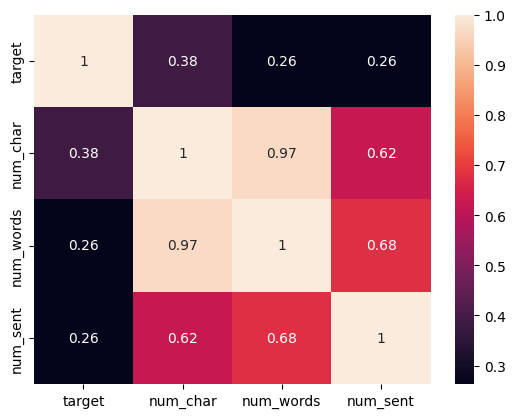

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    filtered_tokens = []

    stop_words = set(stopwords.words('english'))

    for token in tokens:
        if token.isalnum() and token not in stop_words and token not in string.punctuation:
            filtered_tokens.append(ps.stem(token))

    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ps.stem("loving")

'love'

In [ ]:
transform_text("Hi how aeR you VEDIKA loved")

'hi aer vedika love'

In [ ]:
df['text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-40-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1] ['transformed_text'].str.cat(sep = " "))

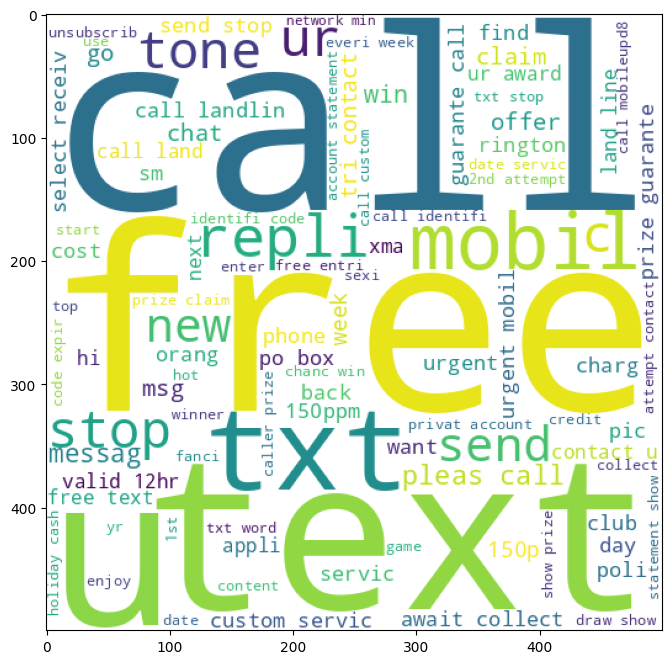

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)


In [ ]:
ham_wc = wc.generate(df[df['target'] == 0] ['transformed_text'].str.cat(sep = " "))

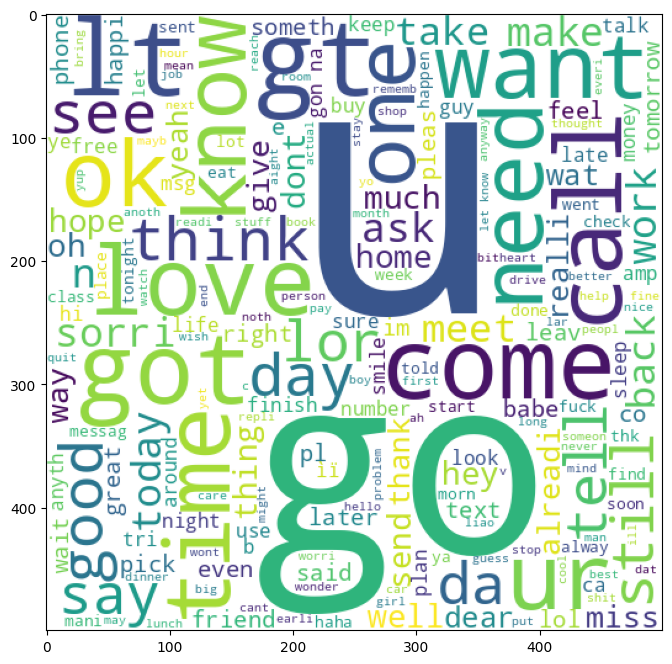

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)


In [ ]:
spam_corpus = []
for msgs in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msgs.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

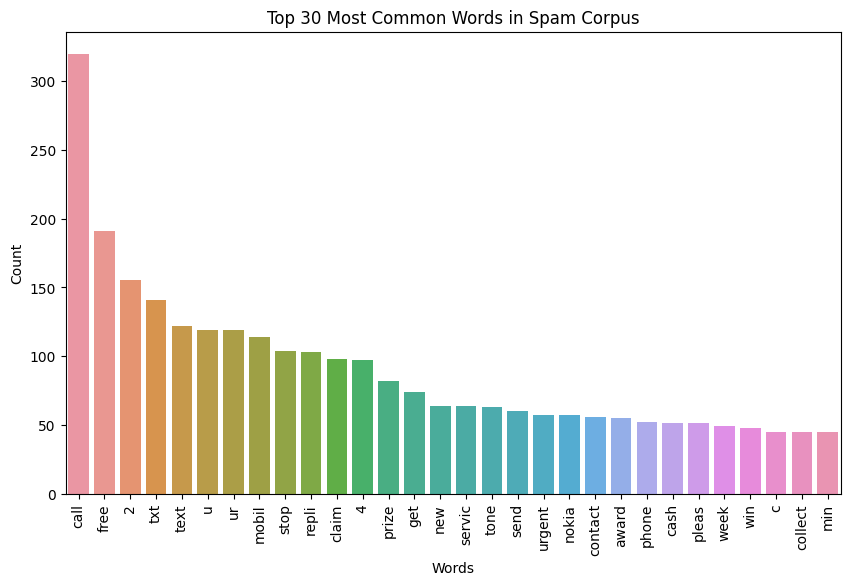

In [ ]:
from collections import Counter

word_counts = Counter(spam_corpus).most_common(30)

word_counts_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 'vertical')
plt.show()


In [ ]:
ham_corpus = []
for msgs in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msgs.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

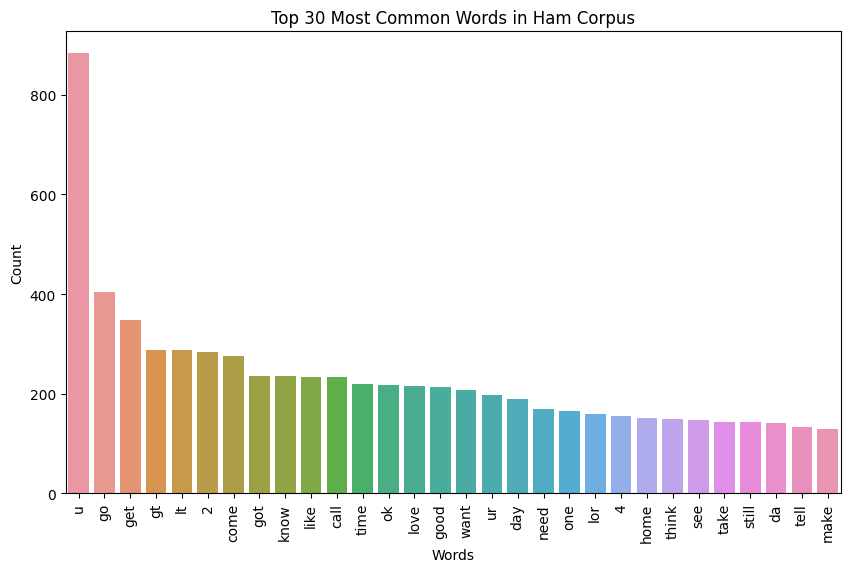

In [ ]:
from collections import Counter

word_counts = Counter(ham_corpus).most_common(30)

word_counts_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 'vertical')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
mnb = MultinomialNB()


In [ ]:
mnb.fit(x_train, y_train)
ypred2 = mnb.predict(x_test)
print(accuracy_score(y_test, ypred2))
print(confusion_matrix(y_test, ypred2))
print(precision_score(y_test, ypred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))